In [22]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib as plt

In [23]:
dataset = pd.read_csv("C:/Users/L390/Documents/Scaping/M1/projet scraping/nom_du_fichier.csv", sep=",")
dataset.head()

,Symbole,Nom,Cours (intrajournalier),Variation,% variation,Cap. boursière,Volume en devise (depuis 0:00 UTC),Volume en devise (24 h),Volume total toutes devises (24 h),Actif circulant,Plage annuelle,Diagramme du jour
0,BTC-EUR,Bitcoin EUR,"60 881,80","+1 515,55","+2,55 %","1,199T","20,577B","20,577B","20,577B","19,688M",NaN,NaN
1,ETH-EUR,Ethereum EUR,"2 951,08","+115,06","+4,06 %","354,342B","8,92B","8,92B","8,92B","120,072M",NaN,NaN
2,USDT-EUR,Tether USDt EUR,"0,93845","+0,00004","+0,00 %","102,961B","41,386B","41,386B","41,386B","109,714B",NaN,NaN
3,BNB-EUR,BNB EUR,"533,99","+17,77","+3,44 %","79,849B","630,997M","630,997M","630,997M","149,533M",NaN,NaN
4,SOL-EUR,Solana EUR,"140,40","+8,88","+6,75 %","62,732B","2,49B","2,49B","2,49B","446,811M",NaN,NaN


In [24]:
dataset.columns

Index(['Symbole', 'Nom', 'Cours (intrajournalier)', 'Variation', '% variation',
       'Cap. boursière', 'Volume en devise (depuis 0:00 UTC)',
       'Volume en devise (24 h)', 'Volume total toutes devises (24 h)',
       'Actif circulant', 'Plage annuelle', 'Diagramme du jour'],
      dtype='object')

In [25]:
print(dataset['Cours (intrajournalier)'])

0     60 881,80
1      2 951,08
2       0,93845
3        533,99
4        140,40
5      0,938021
6      0,491728
7      0,151002
8      0,471624
9      0,000025
10        35,55
11       6,7556
12       477,96
13     0,104067
14        13,90
15     0,688069
16        14,75
17        79,34
18     0,938093
19       7,2897
20        26,01
21       2,5622
22       6,1983
23     0,122370
24       8,0757
Name: Cours (intrajournalier), dtype: object


In [26]:
dataset['Cours (intrajournalier)'] = dataset['Cours (intrajournalier)'].str.replace(',', '.').str.replace(r'[^\d.-]+', '', regex=True)


In [27]:
dataset['Cours (intrajournalier)'] = dataset['Cours (intrajournalier)'].astype(float)

print(dataset['Cours (intrajournalier)'])

0     60881.800000
1      2951.080000
2         0.938450
3       533.990000
4       140.400000
5         0.938021
6         0.491728
7         0.151002
8         0.471624
9         0.000025
10       35.550000
11        6.755600
12      477.960000
13        0.104067
14       13.900000
15        0.688069
16       14.750000
17       79.340000
18        0.938093
19        7.289700
20       26.010000
21        2.562200
22        6.198300
23        0.122370
24        8.075700
Name: Cours (intrajournalier), dtype: float64


In [28]:
# Supposons que 'dataset' est votre DataFrame et que vous voulez afficher la colonne 'Variation'
print(dataset['Variation'])


0     +1 515,55
1       +115,06
2      +0,00004
3        +17,77
4         +8,88
5     +0,000001
6     +0,023201
7     +0,007123
8     +0,033322
9     +0,000004
10        +3,42
11      +0,5427
12       +33,91
13    +0,000978
14        +0,95
15    +0,063404
16        +1,70
17        +3,87
18    +0,000102
19      +0,3256
20        +1,72
21      +0,3162
22      +0,4965
23    +0,007538
24      +0,4566
Name: Variation, dtype: object


In [29]:
# Supposons que vous ayez déjà chargé vos données dans un DataFrame appelé dataset

# Nettoyer les données : remplacer la virgule par un point décimal et supprimer les caractères non numériques
dataset['Variation'] = dataset['Variation'].str.replace(r'[^\d.-]+', '', regex=True).astype(float)



In [30]:
dataset['Variation'] 

0     151555.0
1      11506.0
2          4.0
3       1777.0
4        888.0
5          1.0
6      23201.0
7       7123.0
8      33322.0
9          4.0
10       342.0
11      5427.0
12      3391.0
13       978.0
14        95.0
15     63404.0
16       170.0
17       387.0
18       102.0
19      3256.0
20       172.0
21      3162.0
22      4965.0
23      7538.0
24      4566.0
Name: Variation, dtype: float64

In [31]:
print(dataset["% variation"])

0      +2,55 %
1      +4,06 %
2      +0,00 %
3      +3,44 %
4      +6,75 %
5      +0,00 %
6      +4,95 %
7      +4,95 %
8      +7,60 %
9     +19,15 %
10    +10,66 %
11     +8,74 %
12     +7,64 %
13     +0,95 %
14     +7,33 %
15    +10,15 %
16    +13,02 %
17     +5,13 %
18     +0,01 %
19     +4,67 %
20     +7,07 %
21    +14,08 %
22     +8,71 %
23     +6,56 %
24     +5,99 %
Name: % variation, dtype: object


In [32]:
# Remplacer les virgules par des points décimaux, puis convertir en float
dataset['% variation'] = dataset['% variation'].str.replace(',', '.').str.replace('+', '').str.replace('%', '').astype(float)

# Afficher les 5 premières lignes pour vérifier le résultat
print(dataset.head())


    Symbole              Nom  Cours (intrajournalier)  Variation  % variation  \
0   BTC-EUR      Bitcoin EUR              60881.80000   151555.0         2.55   
1   ETH-EUR     Ethereum EUR               2951.08000    11506.0         4.06   
2  USDT-EUR  Tether USDt EUR                  0.93845        4.0         0.00   
3   BNB-EUR          BNB EUR                533.99000     1777.0         3.44   
4   SOL-EUR       Solana EUR                140.40000      888.0         6.75   

  Cap. boursière Volume en devise (depuis 0:00 UTC) Volume en devise (24 h)  \
0         1,199T                            20,577B                 20,577B   
1       354,342B                              8,92B                   8,92B   
2       102,961B                            41,386B                 41,386B   
3        79,849B                           630,997M                630,997M   
4        62,732B                              2,49B                   2,49B   

  Volume total toutes devises (24 h) A

In [33]:
print(dataset['Cap. boursière'])

0       1,199T
1     354,342B
2     102,961B
3      79,849B
4      62,732B
5      31,851B
6      27,109B
7       21,74B
8      16,801B
9      14,965B
10     13,437B
11        9,7B
12      9,413B
13      9,116B
14       8,16B
15      6,808B
16       6,83B
17      5,906B
18      5,017B
19      4,365B
20      3,814B
21      3,724B
22      3,352B
23      3,252B
24      3,157B
Name: Cap. boursière, dtype: object


In [34]:
# Créer un dictionnaire de suffixes et de leurs valeurs correspondantes en puissance de 10
suffixes = {'K': 1e3, 'M': 1e6, 'md': 1e6, 'B': 1e9, 'T': 1e12}

# Fonction pour remplacer les virgules par des points décimaux et convertir les valeurs avec des suffixes en nombres
def convert_market_cap(value):
    if pd.isnull(value):
        return value  # Retourner la valeur nulle si elle est manquante
    else:
        # Remplacer les virgules par des points décimaux
        value = value.replace(',', '.')
        # Vérifier s'il y a un suffixe dans la valeur
        for suffix, multiplier in suffixes.items():
            if suffix in value:
                # Extraire le nombre et multiplier par le facteur correspondant
                number = float(value.replace(suffix, ''))
                return number * multiplier
        # Si aucun suffixe n'est trouvé, convertir simplement la valeur en float
        return float(value)

# Appliquer la fonction de conversion à la colonne "Cap. boursière"
dataset['Cap. boursière'] = dataset['Cap. boursière'].apply(convert_market_cap)

# Afficher les 5 premières lignes pour vérifier le résultat
print(dataset.head())


    Symbole              Nom  Cours (intrajournalier)  Variation  % variation  \
0   BTC-EUR      Bitcoin EUR              60881.80000   151555.0         2.55   
1   ETH-EUR     Ethereum EUR               2951.08000    11506.0         4.06   
2  USDT-EUR  Tether USDt EUR                  0.93845        4.0         0.00   
3   BNB-EUR          BNB EUR                533.99000     1777.0         3.44   
4   SOL-EUR       Solana EUR                140.40000      888.0         6.75   

   Cap. boursière Volume en devise (depuis 0:00 UTC) Volume en devise (24 h)  \
0    1.199000e+12                            20,577B                 20,577B   
1    3.543420e+11                              8,92B                   8,92B   
2    1.029610e+11                            41,386B                 41,386B   
3    7.984900e+10                           630,997M                630,997M   
4    6.273200e+10                              2,49B                   2,49B   

  Volume total toutes devises (2

In [35]:
print(dataset["Volume en devise (depuis 0:00 UTC)"])

0      20,577B
1        8,92B
2      41,386B
3     630,997M
4        2,49B
5       4,661B
6       1,129B
7       1,495B
8     496,694M
9     886,327M
10    397,613M
11    157,614M
12    446,838M
13    254,614M
14    291,397M
15    233,487M
16    180,062M
17    322,441M
18    614,473M
19    116,256M
20    197,384M
21    107,752M
22    171,439M
23     14,963M
24    100,413M
Name: Volume en devise (depuis 0:00 UTC), dtype: object


In [36]:


# Fonction pour remplacer les virgules par des points décimaux et convertir les valeurs avec des suffixes en nombres
def convert_market_cap(value):
    if pd.isnull(value):
        return value  # Retourner la valeur nulle si elle est manquante
    else:
        # Remplacer les virgules par des points décimaux
        value = value.replace(',', '.')
        # Vérifier s'il y a un suffixe dans la valeur
        for suffix, multiplier in suffixes.items():
            if suffix in value:
                # Extraire le nombre et multiplier par le facteur correspondant
                number = float(value.replace(suffix, ''))
                return number * multiplier
        # Si aucun suffixe n'est trouvé, convertir simplement la valeur en float
        return float(value)

# Appliquer la fonction de conversion à la colonne "Cap. boursière"
dataset["Volume en devise (depuis 0:00 UTC)"]= dataset["Volume en devise (depuis 0:00 UTC)"].apply(convert_market_cap)

# Afficher les 5 premières lignes pour vérifier le résultat
print(dataset["Volume en devise (depuis 0:00 UTC)"])


0     2.057700e+10
1     8.920000e+09
2     4.138600e+10
3     6.309970e+08
4     2.490000e+09
5     4.661000e+09
6     1.129000e+09
7     1.495000e+09
8     4.966940e+08
9     8.863270e+08
10    3.976130e+08
11    1.576140e+08
12    4.468380e+08
13    2.546140e+08
14    2.913970e+08
15    2.334870e+08
16    1.800620e+08
17    3.224410e+08
18    6.144730e+08
19    1.162560e+08
20    1.973840e+08
21    1.077520e+08
22    1.714390e+08
23    1.496300e+07
24    1.004130e+08
Name: Volume en devise (depuis 0:00 UTC), dtype: float64


In [37]:
dataset.columns

Index(['Symbole', 'Nom', 'Cours (intrajournalier)', 'Variation', '% variation',
       'Cap. boursière', 'Volume en devise (depuis 0:00 UTC)',
       'Volume en devise (24 h)', 'Volume total toutes devises (24 h)',
       'Actif circulant', 'Plage annuelle', 'Diagramme du jour'],
      dtype='object')

In [38]:
dataset["Actif circulant"]

0      19,688M
1     120,072M
2     109,714B
3     149,533M
4     446,811M
5      33,955B
6      55,129B
7     143,969B
8      35,625B
9     589,289T
10    377,994M
11      1,436B
12     19,694M
13     87,598B
14      587,1M
15      9,895B
16     462,91M
17     74,444M
18      5,348B
19    598,736M
20    146,654M
21      1,454B
22    540,799M
23     26,572B
24    390,931M
Name: Actif circulant, dtype: object

In [39]:
def convert_market_cap(value):
    if pd.isnull(value):
        return value  # Retourner la valeur nulle si elle est manquante
    else:
        # Remplacer les virgules par des points décimaux
        value = value.replace(',', '.')
        # Vérifier s'il y a un suffixe dans la valeur
        for suffix, multiplier in suffixes.items():
            if suffix in value:
                # Extraire le nombre et multiplier par le facteur correspondant
                number = float(value.replace(suffix, ''))
                return number * multiplier
        # Si aucun suffixe n'est trouvé, convertir simplement la valeur en float
        return float(value)

# Appliquer la fonction de conversion à la colonne "Cap. boursière"
dataset["Actif circulant"]= dataset["Actif circulant"].apply(convert_market_cap)

# Afficher les 5 premières lignes pour vérifier le résultat
print(dataset["Actif circulant"])

0     1.968800e+07
1     1.200720e+08
2     1.097140e+11
3     1.495330e+08
4     4.468110e+08
5     3.395500e+10
6     5.512900e+10
7     1.439690e+11
8     3.562500e+10
9     5.892890e+14
10    3.779940e+08
11    1.436000e+09
12    1.969400e+07
13    8.759800e+10
14    5.871000e+08
15    9.895000e+09
16    4.629100e+08
17    7.444400e+07
18    5.348000e+09
19    5.987360e+08
20    1.466540e+08
21    1.454000e+09
22    5.407990e+08
23    2.657200e+10
24    3.909310e+08
Name: Actif circulant, dtype: float64


In [40]:
# Supposons que votre DataFrame s'appelle dataset
# Accéder à une colonne avec un nom contenant plus de deux espaces
#volumes_en_devise_24h = dataset['Volume en devise (24 h) ']


In [41]:
# Remplacer les virgules par des points décimaux et convertir les valeurs "B" en milliards, "T" en billions, etc.
#dataset['Volumeendevise(24 h)']
#= dataset['Volume en devise (24 h)'].str.replace(',', '.').str.replace("B" , "e9").str.replace("T", "e12", regex=True).astype(float)


In [42]:
dataset.info

<bound method DataFrame.info of         Symbole                    Nom  Cours (intrajournalier)  Variation  \
0       BTC-EUR            Bitcoin EUR             60881.800000   151555.0   
1       ETH-EUR           Ethereum EUR              2951.080000    11506.0   
2      USDT-EUR        Tether USDt EUR                 0.938450        4.0   
3       BNB-EUR                BNB EUR               533.990000     1777.0   
4       SOL-EUR             Solana EUR               140.400000      888.0   
5      USDC-EUR           USD Coin EUR                 0.938021        1.0   
6       XRP-EUR                XRP EUR                 0.491728    23201.0   
7      DOGE-EUR           Dogecoin EUR                 0.151002     7123.0   
8       ADA-EUR            Cardano EUR                 0.471624    33322.0   
9      SHIB-EUR          Shiba Inu EUR                 0.000025        4.0   
10     AVAX-EUR          Avalanche EUR                35.550000      342.0   
11      DOT-EUR           Polkad

In [43]:
dataset.describe()

,Cours (intrajournalier),Variation,% variation,Cap. boursière,Volume en devise (depuis 0:00 UTC),Actif circulant,Plage annuelle,Diagramme du jour
count,25.000000,25.000000,25.00000,2.500000e+01,2.500000e+01,2.500000e+01,0.0,0.0
mean,2607.620198,13093.440000,6.56640,8.029604e+10,3.451151e+09,2.359215e+13,NaN,NaN
std,12154.993022,32083.171644,4.57635,2.437860e+11,9.018705e+09,1.178535e+14,NaN,NaN
min,0.000025,1.000000,0.00000,3.157000e+09,1.496300e+07,1.968800e+07,NaN,NaN
25%,0.688069,172.000000,4.06000,5.017000e+09,1.800620e+08,3.779940e+08,NaN,NaN
50%,6.755600,3162.000000,6.56000,9.413000e+09,3.976130e+08,5.987360e+08,NaN,NaN
75%,35.550000,7123.000000,8.71000,2.710900e+10,1.129000e+09,3.395500e+10,NaN,NaN
max,60881.800000,151555.000000,19.15000,1.199000e+12,4.138600e+10,5.892890e+14,NaN,NaN


In [44]:
# Supprimer les colonnes 'Plage annuelle' et 'Diagramme du jour' du DataFrame
dataset.drop(columns=['Plage annuelle', 'Diagramme du jour'], inplace=True)


In [45]:
dataset.drop(columns=['Symbole'], inplace = True)

In [66]:
dataset.drop(columns=["Volume en devise (depuis 0:00 UTC)"], inplace= True)

In [ ]:
dataset.info

In [ ]:
dataset.describe()

In [ ]:
dataset["Nom"].value_counts()

In [47]:
dataset["Cours (intrajournalier)"].value_counts()

Cours (intrajournalier)
60881.800000    1
0.104067        1
0.122370        1
6.198300        1
2.562200        1
26.010000       1
7.289700        1
0.938093        1
79.340000       1
14.750000       1
0.688069        1
13.900000       1
477.960000      1
2951.080000     1
6.755600        1
35.550000       1
0.000025        1
0.471624        1
0.151002        1
0.491728        1
0.938021        1
140.400000      1
533.990000      1
0.938450        1
8.075700        1
Name: count, dtype: int64

In [48]:
dataset.isnull()

,Nom,Cours (intrajournalier),Variation,% variation,Cap. boursière,Volume en devise (depuis 0:00 UTC),Volume en devise (24 h),Volume total toutes devises (24 h),Actif circulant
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Cours (intrajournalier)', ylabel='Nom'>

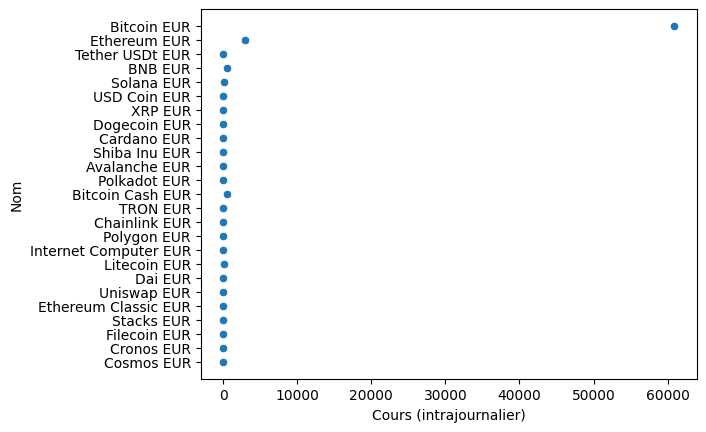

In [49]:
sns.scatterplot(x="Cours (intrajournalier)", y="Nom", data=dataset)


C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to N

AttributeError: module 'matplotlib' has no attribute 'show'

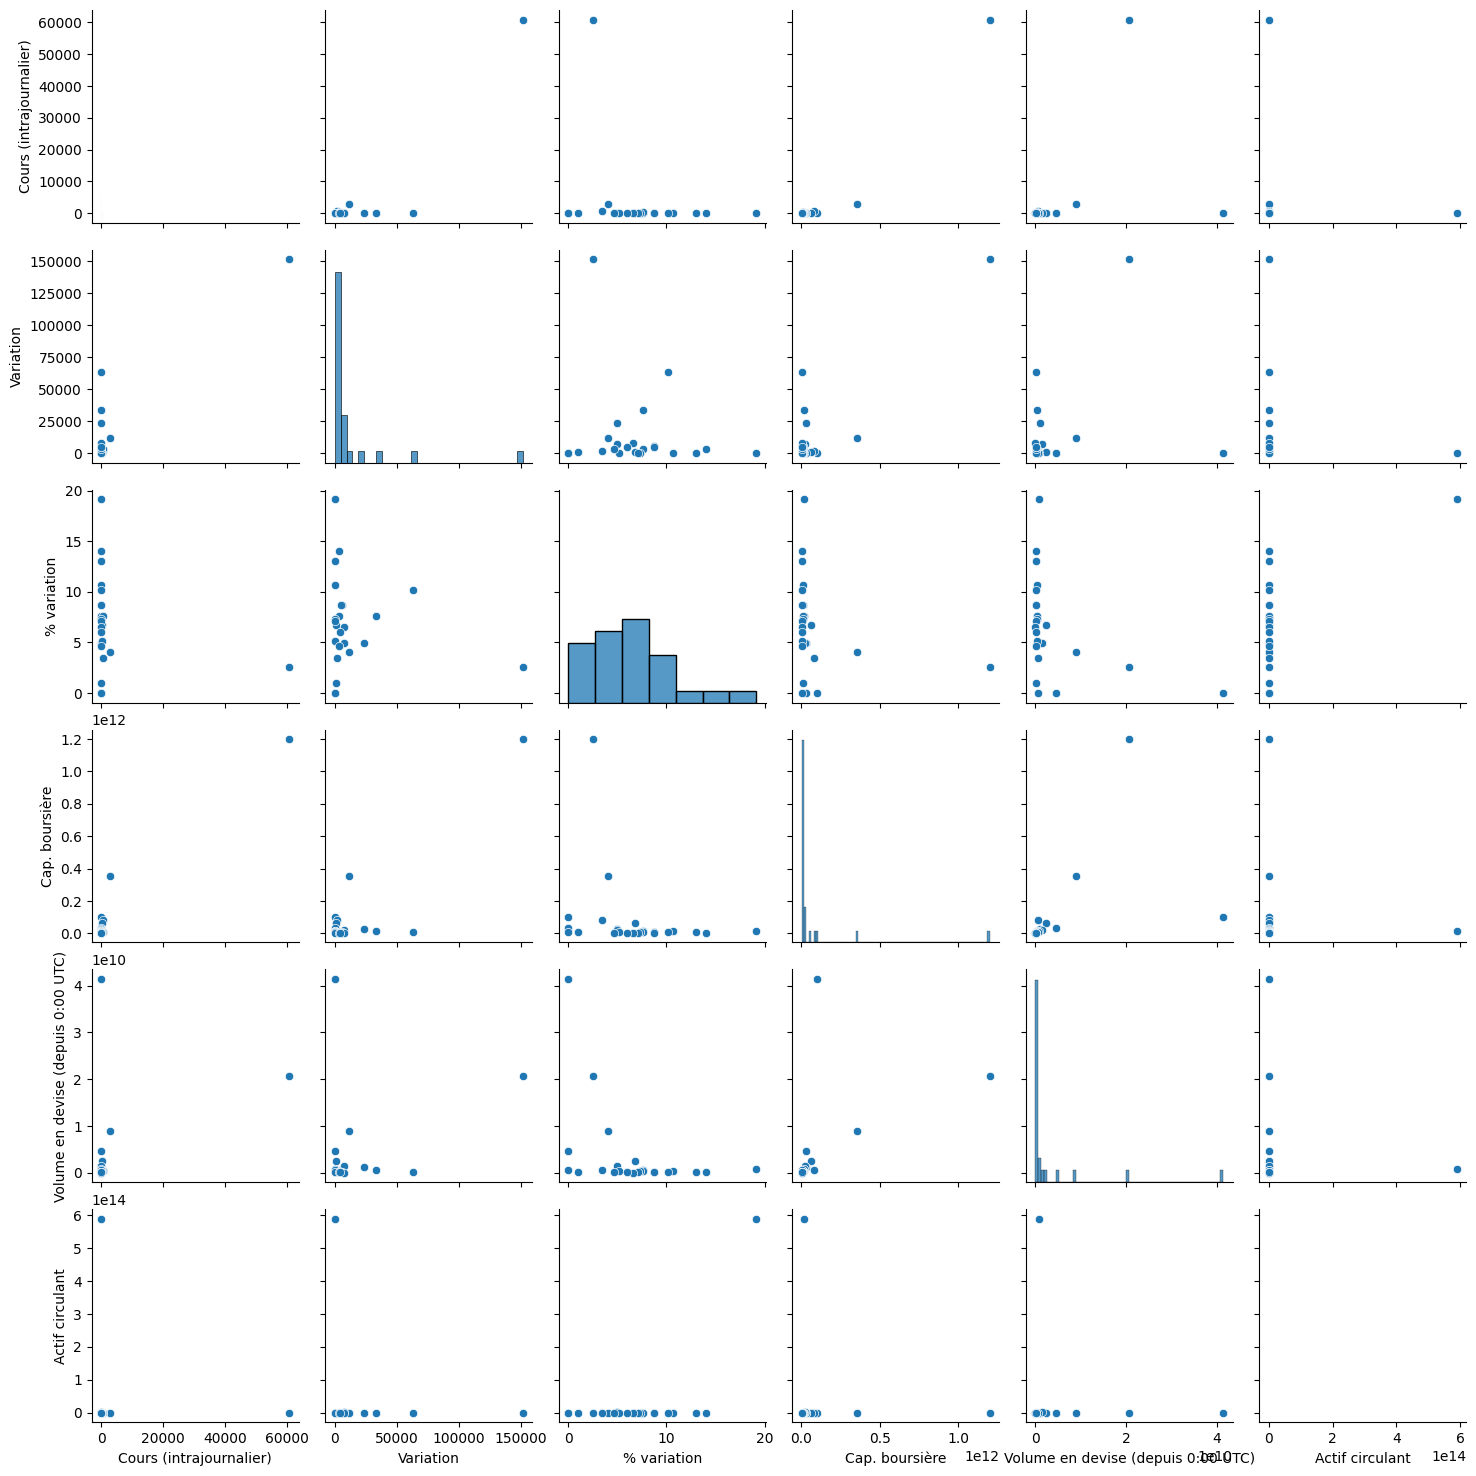

In [50]:

# Code pour créer le pairplot
sns.pairplot(dataset)
plt.show()


C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will ne

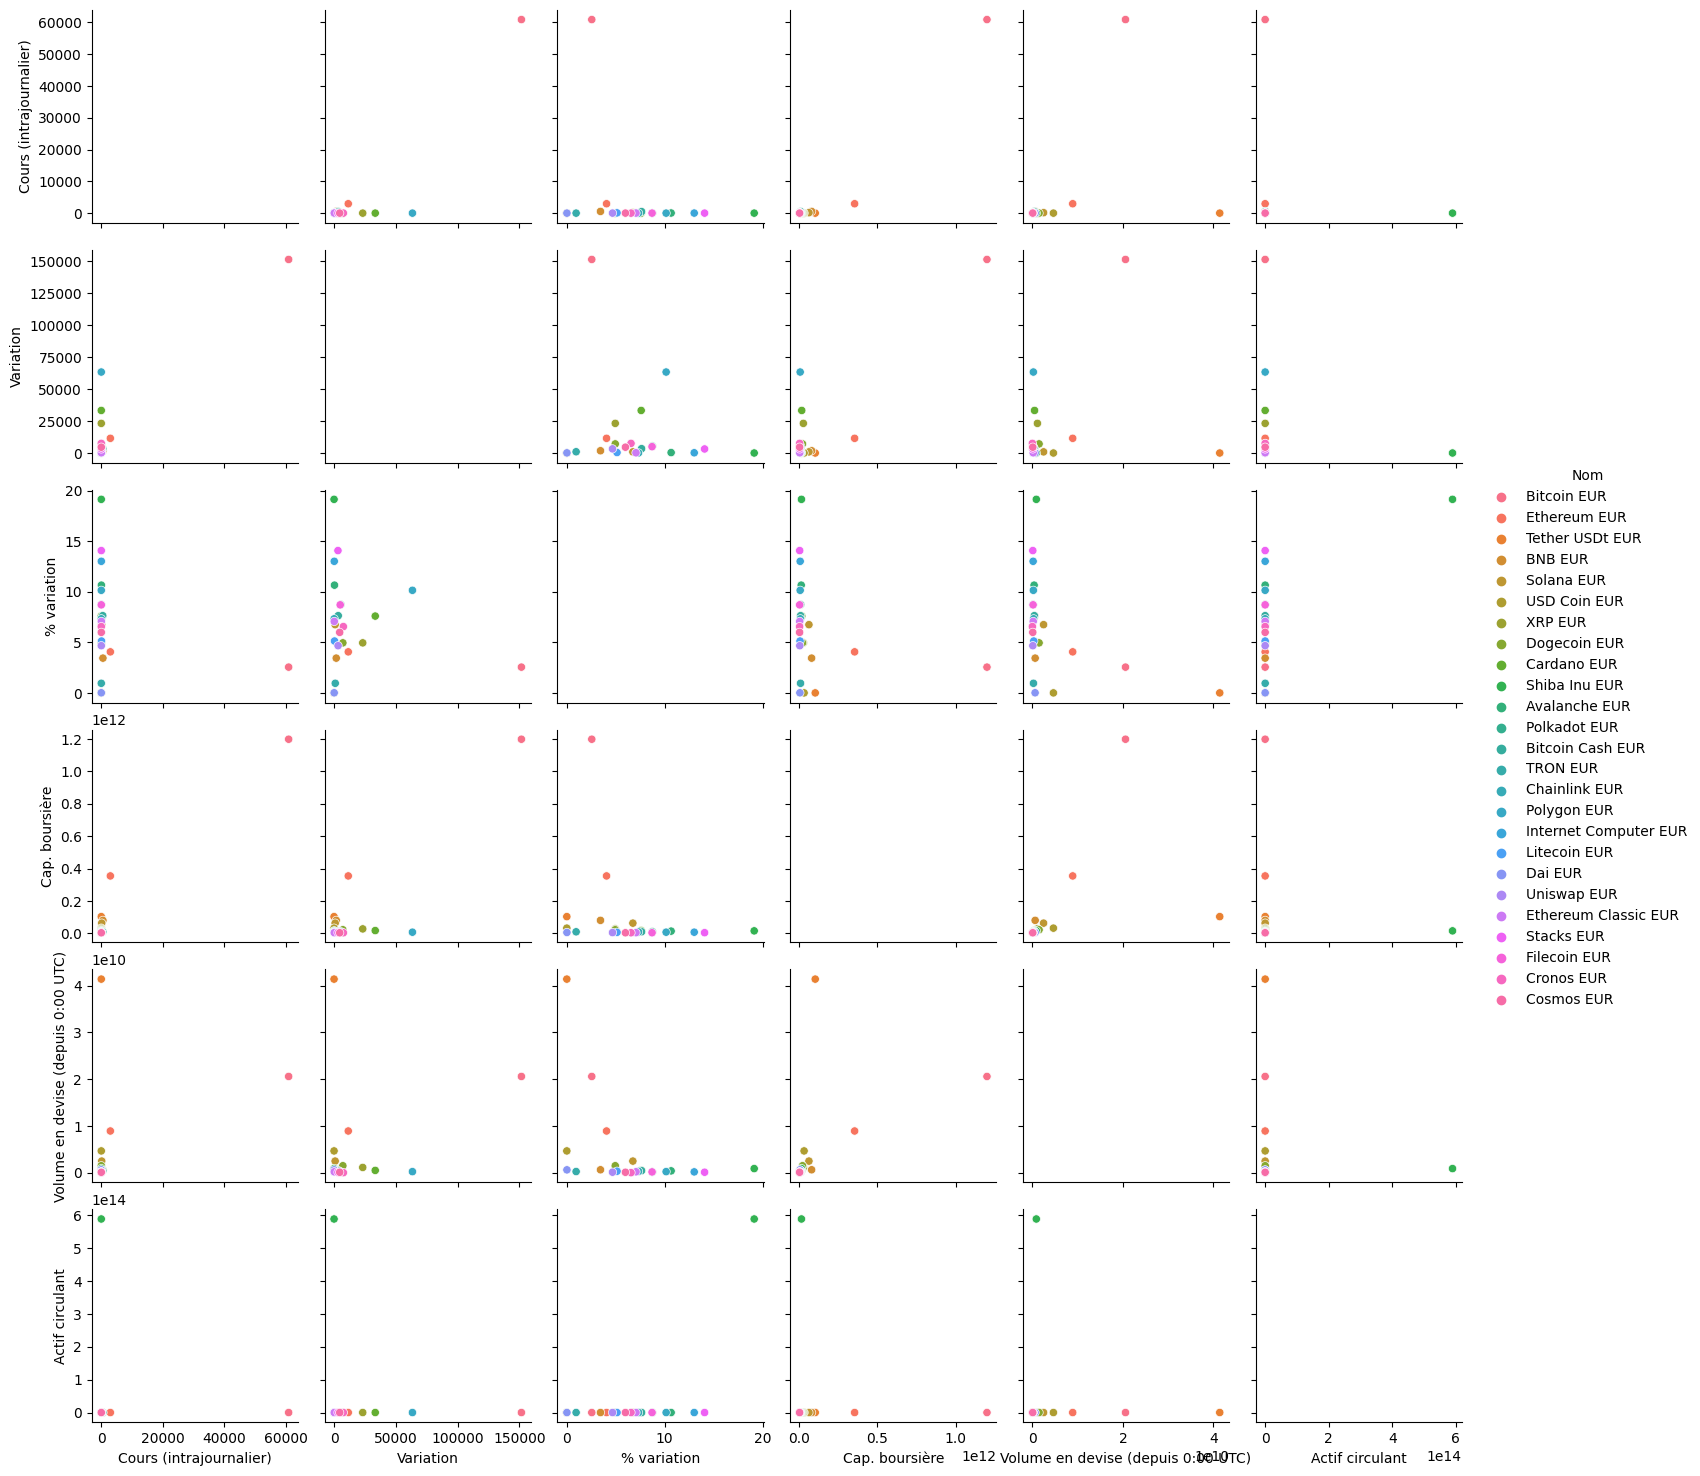

In [51]:
sns.pairplot(data = dataset,hue="Nom")

C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to N

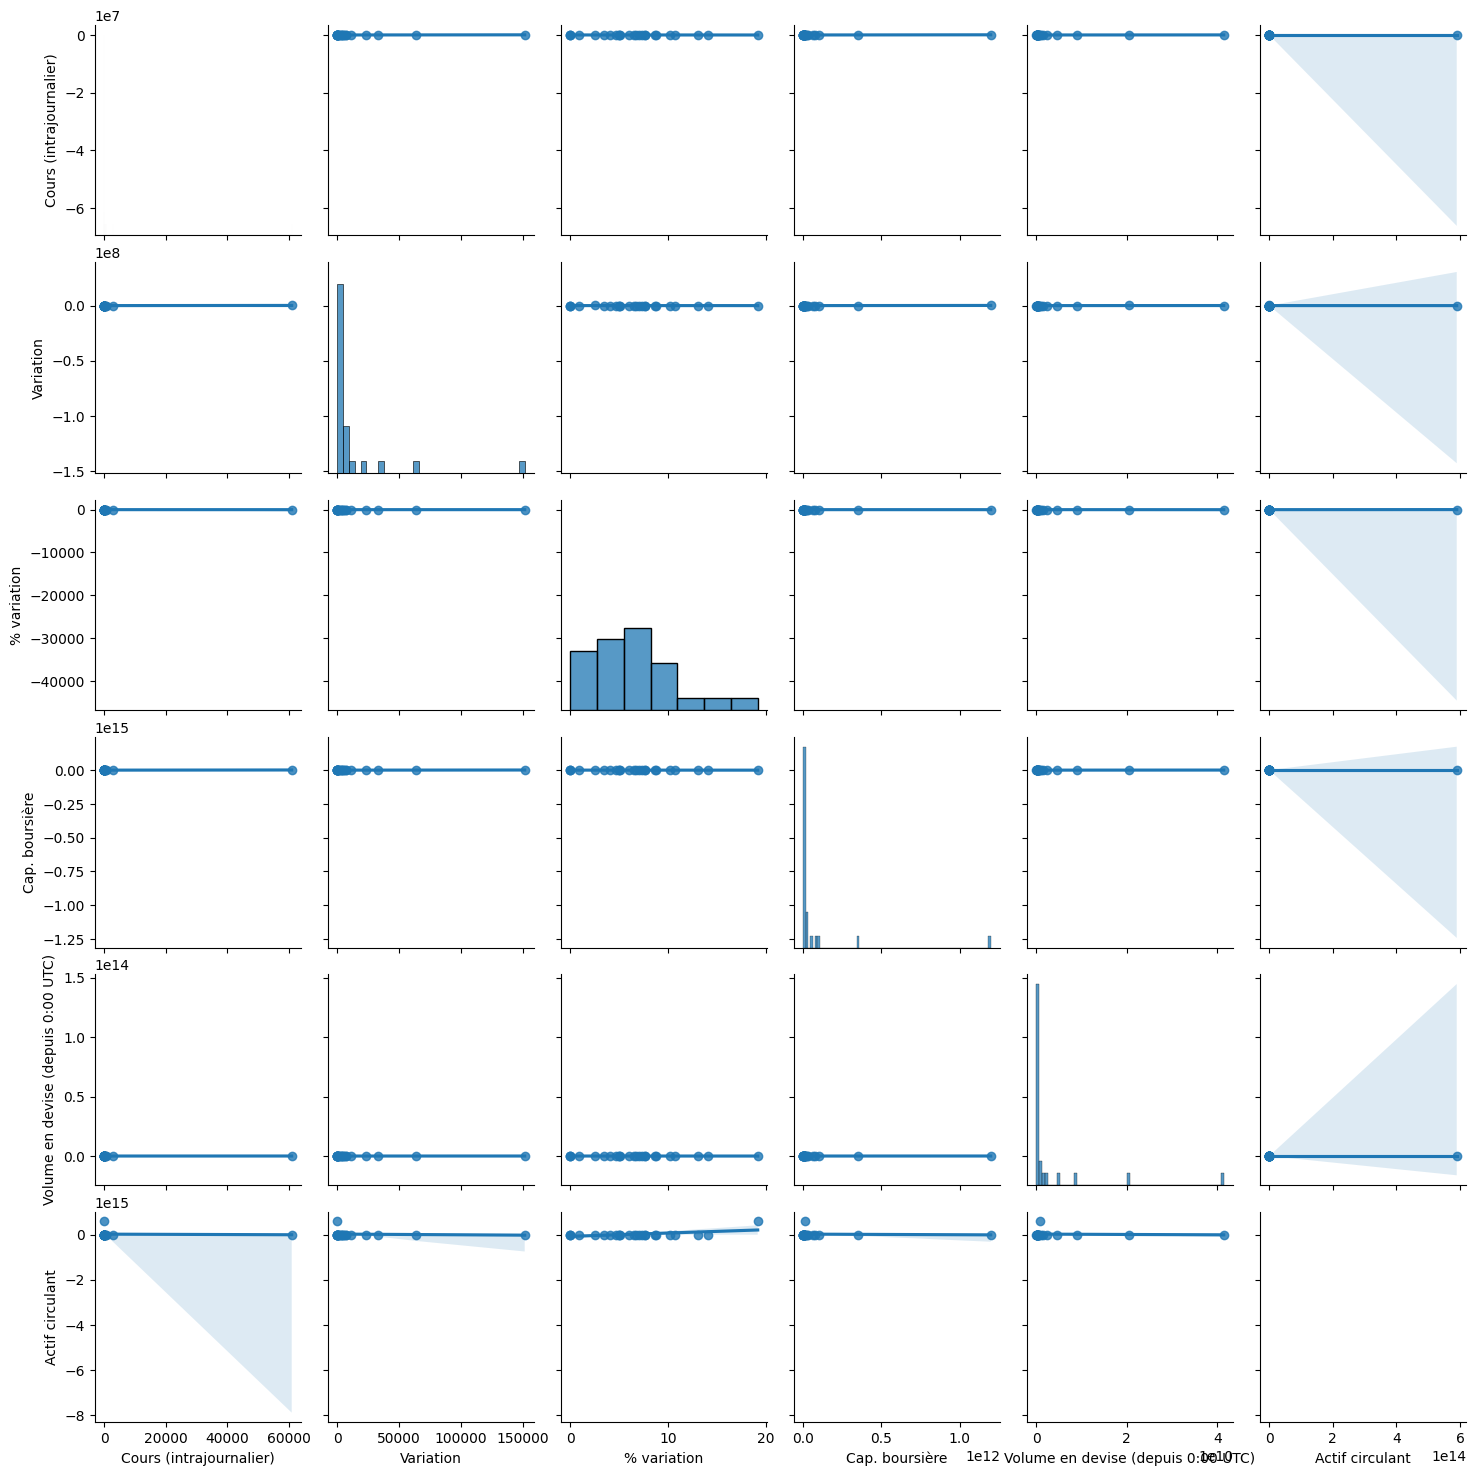

In [52]:
gr=sns.pairplot(dataset, kind= "reg")

C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Nom', ylabel='Variation'>

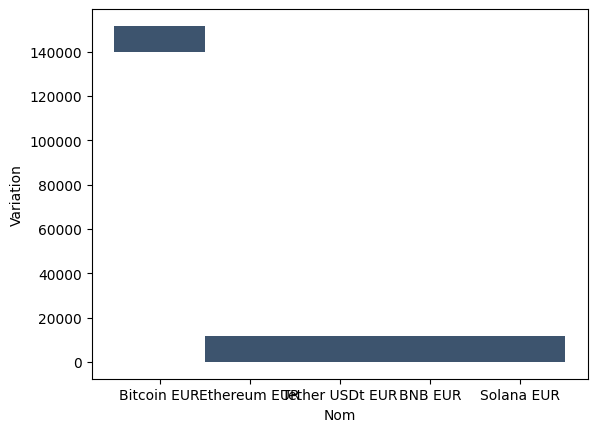

In [53]:
sns.histplot(data=dataset.head(5), x="Nom", y="Variation")


C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Nom', ylabel='Variation'>

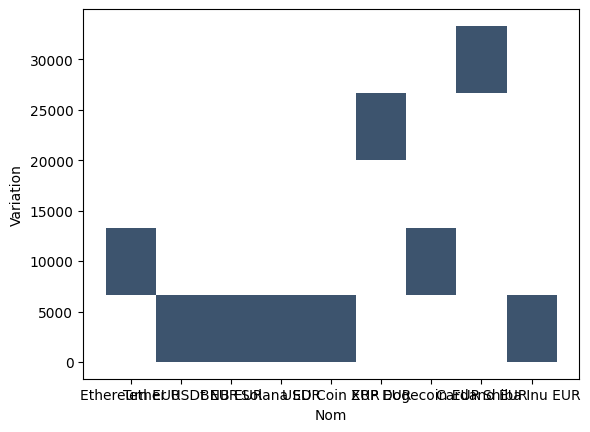

In [54]:
sns.histplot(data=dataset.iloc[1:10], x="Nom", y="Variation")


C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L390\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Nom', ylabel='Cours (intrajournalier)'>

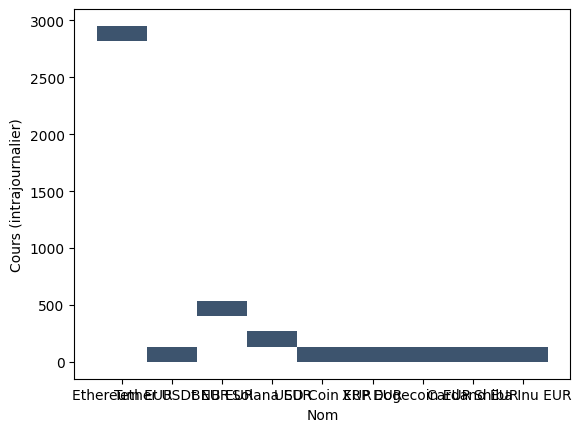

In [55]:
sns.histplot(data=dataset.iloc[1:10], x="Nom", y="Cours (intrajournalier)")


<Axes: xlabel='Nom', ylabel='count'>

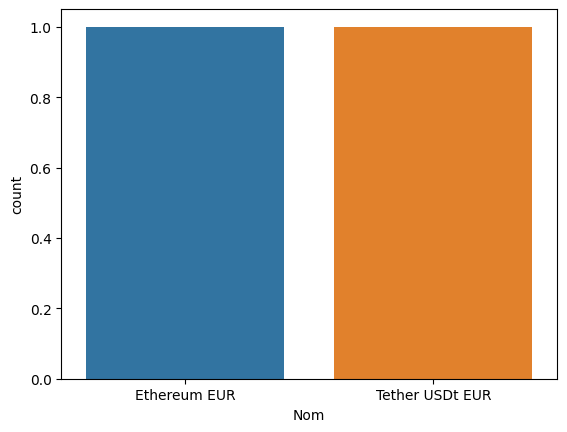

In [56]:


# Sélectionner les 10 premières lignes du DataFrame
subset_data = dataset.iloc[1:3]

# Créer le graphique à barres
sns.countplot(data=subset_data, x="Nom")


In [ ]:
dataset["Nom"].value_counts().plot.pie(autopct='%1.1f%%')


In [ ]:
sns.barplot(data=dataset, y="Nom", x="Cours (intrajournalier)")


In [ ]:
sns.barplot(data=dataset, y="Nom", x="Variation")


In [ ]:
sns.barplot(data=dataset, y="Nom", x="Actif circulant")

In [ ]:
sns.regplot(data=dataset, x="Cours (intrajournalier)", y="Variation")


In [ ]:
## sns.regplot(data=dataset, x="Actif circulant", y="Variation")


In [ ]:
sns.regplot(data=dataset, x="Nom", y="Actif circulant")


In [58]:
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

ValueError: could not convert string to float: 'Bitcoin EUR'

In [ ]:
# Convertir la colonne "Nom" en type catégorique
dataset["Nom"] = dataset["Nom"].astype("category")

# Créer le graphique à barres
sns.countplot(data=dataset.iloc[1:10], x="Nom")


In [ ]:
sns.boxplot(data=dataset, x="Actif circulant")


In [ ]:
sns.boxplot(data=dataset, x="Variation")

<Axes: xlabel='Cours (intrajournalier)'>

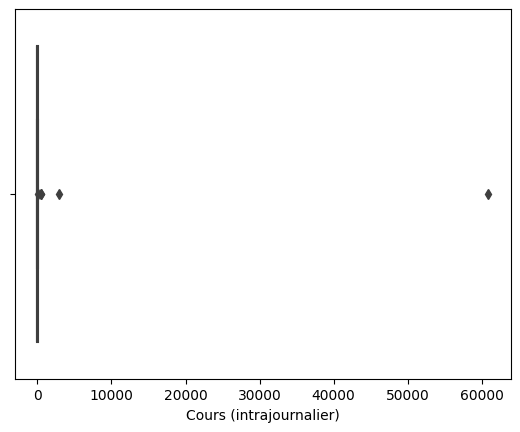

In [91]:
sns.boxplot(data=dataset, x="Cours (intrajournalier)")

In [65]:
# Fonction pour remplacer les virgules par des points décimaux et convertir les valeurs avec des suffixes en nombres
def convert_market_cap(value):
    if pd.isnull(value):
        return value  # Retourner la valeur nulle si elle est manquante
    else:
        # Remplacer les virgules par des points décimaux
        value = value.replace(',', '.')
        # Vérifier s'il y a un suffixe dans la valeur
        for suffix, multiplier in suffixes.items():
            if suffix in value:
                # Extraire le nombre et multiplier par le facteur correspondant
                number = float(value.replace(suffix, ''))
                return number * multiplier
        # Si aucun suffixe n'est trouvé, convertir simplement la valeur en float
        return float(value)

# Appliquer la fonction de conversion à la colonne "Volume en devise (24 h)"
dataset["Volume en devise (24 h)"] = dataset["Volume en devise (24 h)"].apply(convert_market_cap)
print(dataset["Volume en devise (24 h)"])

KeyError: 'Volume en devise (24 h)'

<Axes: xlabel='Nom', ylabel='Cours (intrajournalier)'>

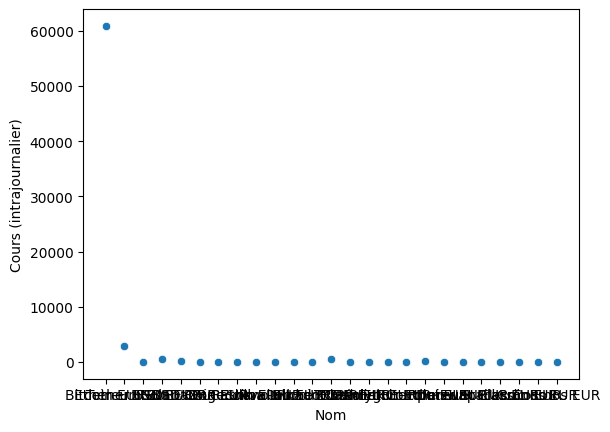

In [60]:
sns.scatterplot(x="Nom", y= "Cours (intrajournalier)",data= dataset)

In [62]:
multipliers = {'T': 10**16, 'B': 10**12}

def convert_market_cap(value):
    if pd.isnull(value):
        return value  # Retourner la valeur nulle si elle est manquante
    elif isinstance(value, (int, float)):
        return value  # Retourner la valeur si elle est déjà un nombre
    else:
        # Diviser la valeur en nombre et suffixe si elle contient un espace
        parts = value.split()
        if len(parts) == 2:  # S'assurer qu'il y a deux parties après la division
            number, suffix = parts
            # Convertir le nombre en float
            number = float(number.replace(',', ''))
            # Multiplier le nombre par le multiplicateur correspondant
            return number * multipliers.get(suffix, 1)  # Utiliser 1 comme multiplicateur par défaut si le suffixe n'est pas trouvé dans le dictionnaire
        else:
            return value  # Retourner la valeur d'origine si la division n'a pas réussi


In [70]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Nom                                 25 non-null     object 
 1   Cours (intrajournalier)             25 non-null     float64
 2   Variation                           25 non-null     float64
 3   % variation                         25 non-null     float64
 4   Cap. boursière                      25 non-null     float64
 5   Volume en devise (24 h)             25 non-null     object 
 6   Volume total toutes devises (24 h)  25 non-null     object 
 7   Actif circulant                     25 non-null     float64
dtypes: float64(5), object(3)
memory usage: 1.7+ KB
